# Using variable learning rates
This notebook is an experiment to measure the effect of alpha (learning rate) on the gensim training.

The initial question was: *does using a fixed / variable alpha has an effect on the observed convergence of w2v models?*

This notebook runs two sets of models with the same parameters, except one set has a fixed learning rate while the other has a variable learning rate.

Based on several runs of this notebook, there doesn't seem to be any difference in the convergence curves. This implies that the learning rate has little effect on the final model (there must be a difference, but it is not noticable on the convergence).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
minSentences = 1e4
maxSentences = 1.5e5
vector_size = 300
nSteps = 25
chunkSize = 1000
randomSeed = 1
y0 = 1785

In [4]:
years = np.arange(1785, 1795)

In [5]:
from convergence import *

Using data from : /home/carlosm/Projects/ShiCo/data/times/
Using cache from: /home/carlosm/Projects/ShiCo/data/cache/


In [6]:
modelFolder = './models'

generateModelsForPeriod(years, minSentences, maxSentences, nSteps, chunkSize, randomSeed, vector_size, modelFolder)
convergence, sentenceYearCounter, vocabSize = computeConvergenceOverYearRangeWithBuildModels(modelFolder, vector_size)

fname = modelFolder + '/convergenceRange_%d.pkl'%y0
pkl.dump((convergence, sentenceYearCounter, vocabSize), open(fname, 'wb'))

Chunks for 1785 have already been created. Skipping...
Chunks for 1786 have already been created. Skipping...
Chunks for 1787 have already been created. Skipping...
Chunks for 1788 have already been created. Skipping...
Chunks for 1789 have already been created. Skipping...
Chunks for 1790 have already been created. Skipping...
Chunks for 1791 have already been created. Skipping...
Chunks for 1792 have already been created. Skipping...
Chunks for 1793 have already been created. Skipping...
Chunks for 1794 have already been created. Skipping...
Building model:  ./models/1785_000000010000.w2v
...saving
Building model:  ./models/1785_000000011194.w2v
...saving
Building model:  ./models/1785_000000012531.w2v
...saving
Building model:  ./models/1785_000000014028.w2v
...saving
Building model:  ./models/1785_000000015704.w2v
...saving
Building model:  ./models/1785_000000017580.w2v
...saving
Building model:  ./models/1785_000000019679.w2v
...saving
Building model:  ./models/1785_000000022030.

In [7]:
modelFolder = './models-b'

generateModelsForPeriod(years, minSentences, maxSentences, nSteps, chunkSize, randomSeed, vector_size, modelFolder, fixedAlpha=True)
convergence, sentenceYearCounter, vocabSize = computeConvergenceOverYearRangeWithBuildModels(modelFolder, vector_size)

fname = modelFolder + '/convergenceRange_%d.pkl'%y0
pkl.dump((convergence, sentenceYearCounter, vocabSize), open(fname, 'wb'))

Chunks for 1785 have already been created. Skipping...
Chunks for 1786 have already been created. Skipping...
Chunks for 1787 have already been created. Skipping...
Chunks for 1788 have already been created. Skipping...
Chunks for 1789 have already been created. Skipping...
Chunks for 1790 have already been created. Skipping...
Chunks for 1791 have already been created. Skipping...
Chunks for 1792 have already been created. Skipping...
Chunks for 1793 have already been created. Skipping...
Chunks for 1794 have already been created. Skipping...
Building model:  ./models-b/1785_000000010000.w2v
...using fixed alpha...
...saving
Building model:  ./models-b/1785_000000011194.w2v
...using fixed alpha...
...saving
Building model:  ./models-b/1785_000000012531.w2v
...using fixed alpha...
...saving
Building model:  ./models-b/1785_000000014028.w2v
...using fixed alpha...
...saving
Building model:  ./models-b/1785_000000015704.w2v
...using fixed alpha...
...saving
Building model:  ./models-b/17

In [8]:
def doPlots(convergence, sentenceYearCounter):
    semilogx(convergence.keys(), convergence.values(), 'x-')
    xlabel('# Sentences')
    ylabel('Convergence')
    for year,sentenceCount in sentenceYearCounter.iteritems():
        plot([sentenceCount,sentenceCount], [0,1],'--', color='#aaaaaa')
        text(sentenceCount, 0.5, str(year), rotation=270)
    ax = axis()
    # axis([ ax[0], ax[1], 0.0, 1.0 ])


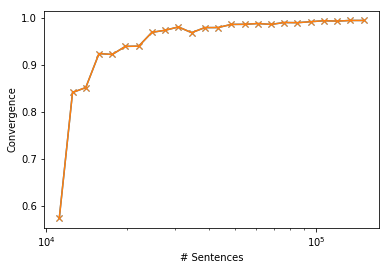

In [9]:
files = [ 'models/convergenceRange_1785.pkl', 'models-b/convergenceRange_1785.pkl' ]

for f in files:
    convergence, sentenceYearCounter, vocabSize = pkl.load(open(f, 'rb'))
    doPlots(convergence, sentenceYearCounter)